
# **Fashion MNIST CNN MODEL**

In this project, we will build a CNN model that predicts accurately the images in the fashion mnist dataset. The dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The classes are:

Label :	Description
<li>0	: T-shirt/top</li>
<li>1	:Trouser</li>
<li>2	: Pullover</li>
<li>3	: Dress</li>
<li>4	: Coat</li>
<li>5	: Sandal</li>
<li>6	: Shirt</li>
<li>7	: Sneaker</li>
<li>8	: Bag</li>
<li>9	: Ankle boot</li>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
#loading the data and splitting it into train and test dataset

(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

#### PREPOCESSING

##### RESHAPING

In [26]:
#original shape
X_train.shape

(60000, 28, 28)

the original shape of the dataset is shown above, however, Keras expects input data in the format(samples, weight, height, channels) we have to reshape our data to include channel. Since the dataset is a grayscale image, it only has one channel.

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

##### Normalization

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Normalization is useful in bringing the input values to same range. we are dividing by 255 to scale the values to a range of 0 to 1.

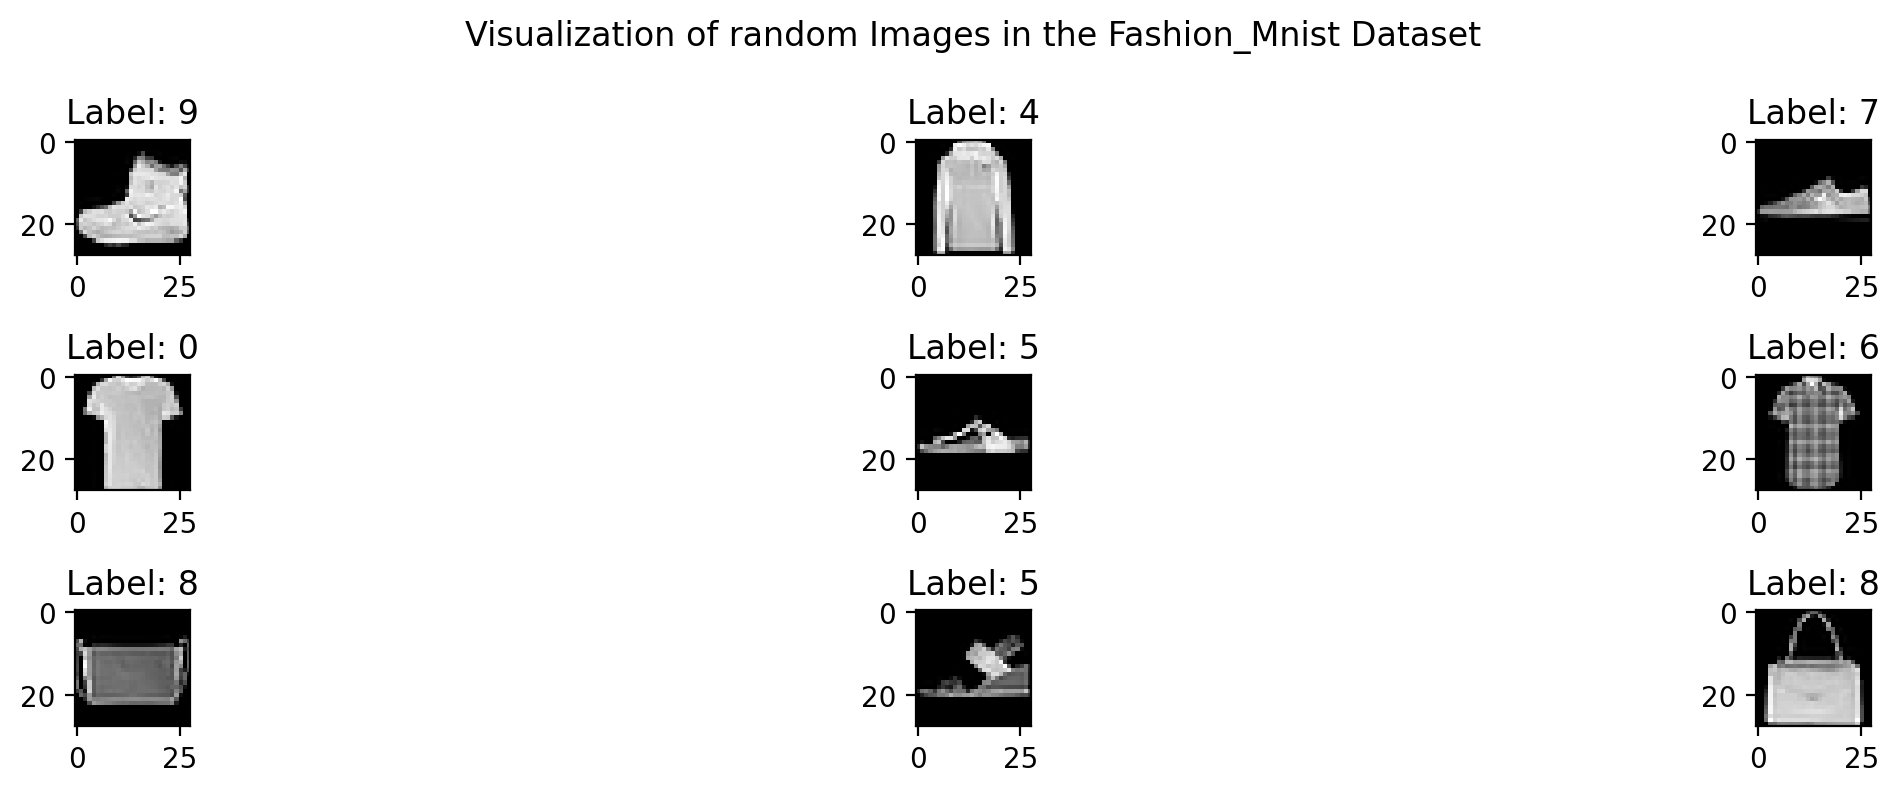

In [34]:
#Visualizing the dataset



fig, ax= plt.subplots(nrows=3,ncols=3)
ax[0,0].imshow(X_train[0], cmap='gray')
ax[0,1].imshow(X_train[24], cmap='gray')
ax[0,2].imshow(X_train[87], cmap='gray')
ax[1,0].imshow(X_train[154], cmap='gray')
ax[1,1].imshow(X_train[577], cmap='gray')
ax[1,2].imshow(X_train[72], cmap='gray')
ax[2,0].imshow(X_train[421], cmap='gray')
ax[2,1].imshow(X_train[217], cmap='gray')
ax[2,2].imshow(X_train[654], cmap='gray')

#adding labels
ax[0, 0].set_title(f"Label: {y_train[0]}")
ax[0, 1].set_title(f"Label: {y_train[24]}")
ax[0, 2].set_title(f"Label: {y_train[87]}")
ax[1, 0].set_title(f"Label: {y_train[154]}")
ax[1, 1].set_title(f"Label: {y_train[577]}")
ax[1, 2].set_title(f"Label: {y_train[72]}")
ax[2, 0].set_title(f"Label: {y_train[421]}")
ax[2, 1].set_title(f"Label: {y_train[217]}")
ax[2, 2].set_title(f"Label: {y_train[654]}")

#adding title
fig.suptitle('Visualization of random Images in the Fashion_Mnist Dataset')
fig.tight_layout()
plt.show()

The above plot shows some of the images in the dataset. Our project is to build a model that will accuartely predict the images using CNN.

#### CONVOLUTIONAL NEURAL NETWORK MODEL

In [30]:
#building our model architecture

cnn_model=Sequential()

#input layer
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

#hidden layers
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))

#output layer
cnn_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The CNN model has several layers. The input layer, the hidden layers and the output layer. The model uses the relu and soft max activation function. The CNN model architecture is built with Conv2D, MaxPooling2D, Dense and Flatten layers embedded in it.

In [31]:
#compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Compile helps prepare the model for training. Compile helps to optimise the model during training, it uses the loss parameter to evaluate the model's performance during training and finally, it states the metrics for which the model is being evaluated by during training.

In [32]:
#Training the model

cnn_model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 121ms/step - accuracy: 0.6758 - loss: 0.9029
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - accuracy: 0.8527 - loss: 0.4083
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.8754 - loss: 0.3448
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.8899 - loss: 0.3013
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.8999 - loss: 0.2804
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.9066 - loss: 0.2555
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.9146 - loss: 0.2362
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 113ms/step - accuracy: 0.9176 - loss: 0.2233
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.9232 - loss: 0.2096
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.9258 - loss: 0.2035


After training the model. the model has an accuracy of 93%.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


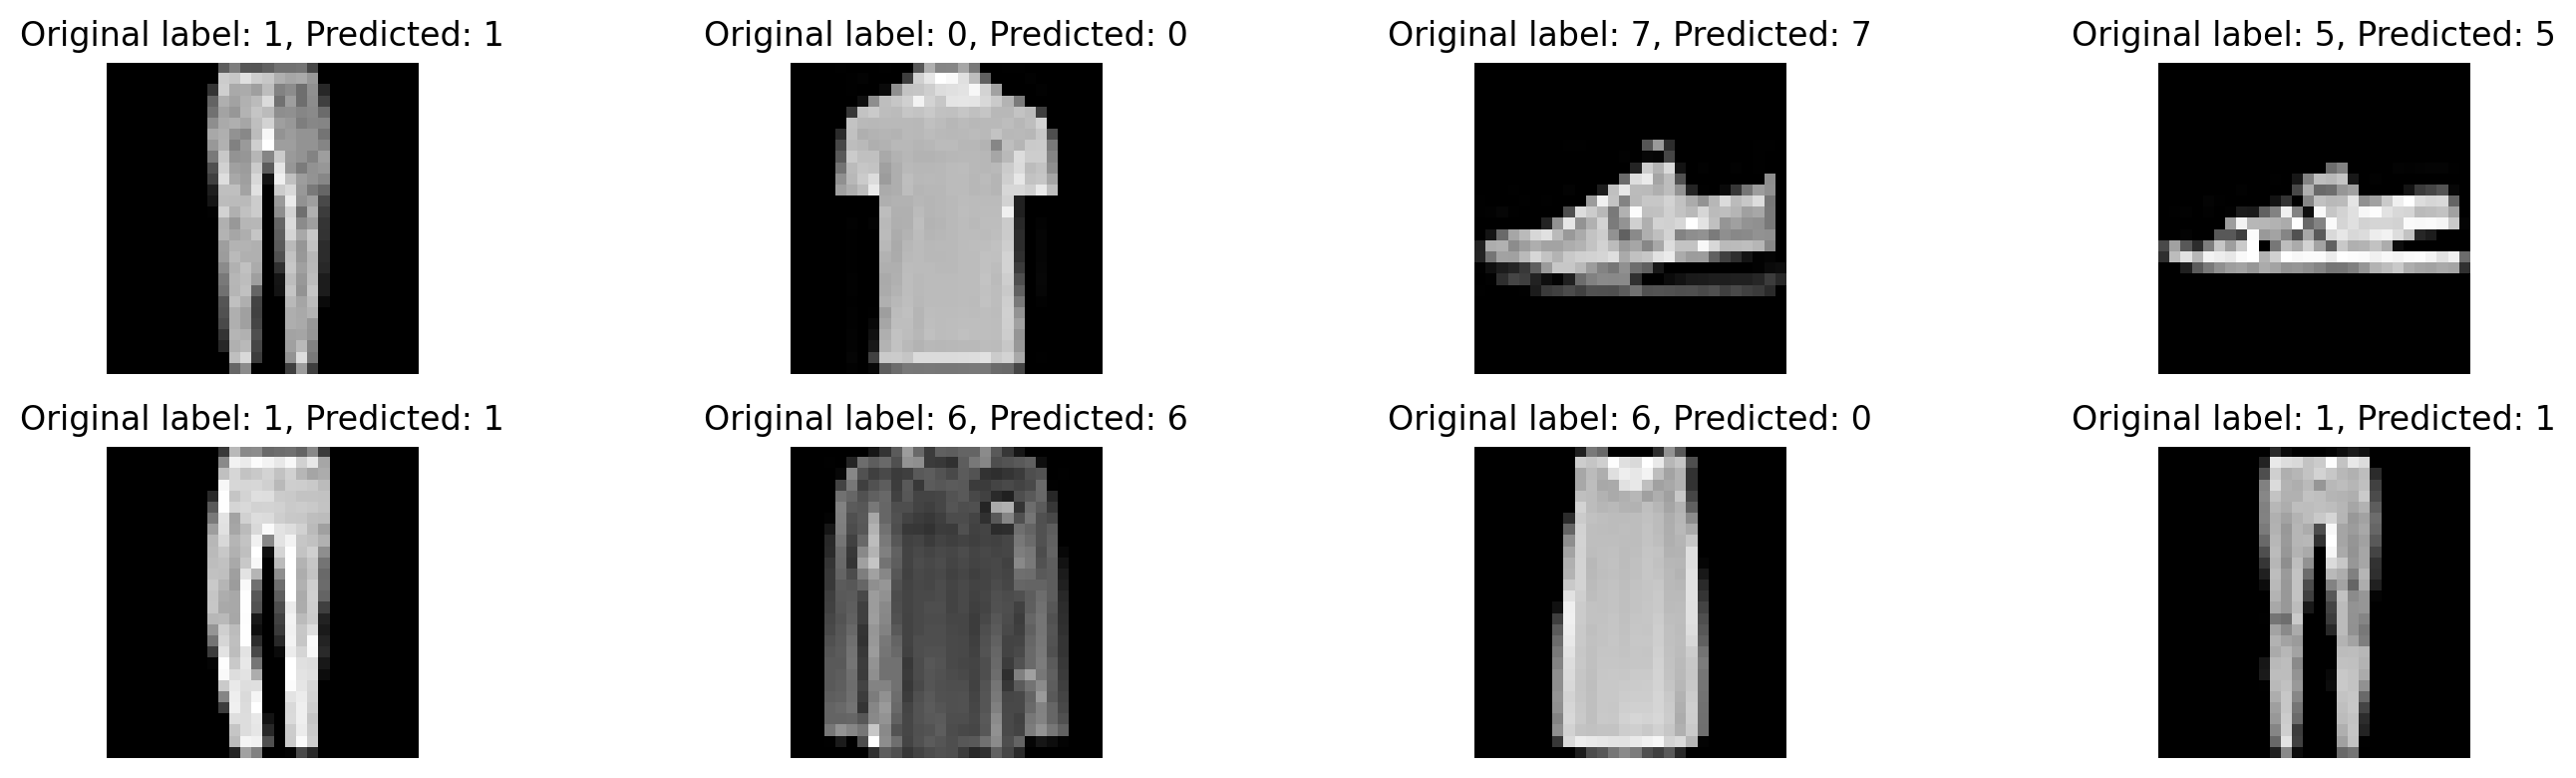

In [33]:
sample_indices = np.random.choice(X_test.shape[0], 8, replace=False)  # Randomly select 5 indices
sample_images = X_test[sample_indices]
original_labels = y_test[sample_indices]

predictions = cnn_model.predict(sample_images)

# Display the images and their predicted labels

fig, axes = plt.subplots(2,4)
for i, ax in enumerate(axes.flat):
  ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
  ax.set_title(f"Original label: {original_labels[i]}, Predicted: {np.argmax(predictions[i])}")
  ax.axis('off')

plt.tight_layout()
plt.show()

The model predicts accurately 7 out of 8 random images. which is not a bad value, However with further training, and more data, the model will be able to classify images 100%